In [4]:
from bs4 import BeautifulSoup
import requests
import re
import unidecode
import time
import os
import json
import joblib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

import warnings
warnings.simplefilter('ignore')

Importer le fichier csv

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,commentaire,note
0,est trop bien les vue juillet ouaisssssssssss...,1.0
1,surement plus faible la trilogie trop raccour...,1.0
2,bon film qui mêle aventure fantastique esprit...,1.0
3,rien dire cette trilogie termine comme elle a...,1.0
4,incroyable pour moi meilleur scénario tous te...,1.0


In [5]:
print(f'{df.shape[0]:-<20} nombre de lignes')
print(f'{df.shape[1]:-<20} nombre de colonnes')

29768--------------- nombre de lignes
2------------------- nombre de colonnes


## Créer un jeu de train, un jeu de test, un jeu de validation

In [6]:
data = df.copy()
variable = data['commentaire'] 
target = data['note']

X_train_test, X_val, y_train_test, y_val = train_test_split(variable, target, test_size = 0.1, stratify = target)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size = 0.2, stratify = y_train_test)

In [7]:
print(f'{variable.shape[0]:-<10}nombre de variables totales')
print(f'{X_train.shape[0]:-<10}nombre de variables du jeu d\'entraînement')
print(f'{X_test.shape[0]:-<10}nombre de variables du jeu de test')
print(f'{X_val.shape[0]:-<10}nombre de variables du jeu de validation')

29768-----nombre de variables totales
21432-----nombre de variables du jeu d'entraînement
5359------nombre de variables du jeu de test
2977------nombre de variables du jeu de validation


---------------------------------

# Apprentissage

### transformer les mots en matrices

In [8]:
stops = stopwords.words('french')

cvec = TfidfVectorizer(max_features=500, decode_error='ignore', stop_words=stops, lowercase=True, strip_accents='ascii')
tfidf_matrix = cvec.fit_transform(X_train)
feature_names = cvec.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

X_train = pd.DataFrame(denselist, columns=feature_names)

/home/erwan/projets/nlp/.env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['etaient', 'etais', 'etait', 'etant', 'etante', 'etantes', 'etants', 'ete', 'etee', 'etees', 'etes', 'etiez', 'etions', 'eumes', 'eutes', 'fumes', 'futes', 'meme'] not in stop_words.
  warnings.warn(


In [9]:
test = cvec.transform(X_test)
dense = test.todense()
denselist = dense.tolist()

X_test = pd.DataFrame(denselist, columns=feature_names)

In [13]:
X_val.head()

28598     pas aimé scénario la réalisation beaucoup bru...
14271          une merveille scénario de réalisation voir 
26758     première fois ma vie que ressent tel sentimen...
9052      très bon film bon casting mais pensi il faut ...
15427     susan un plan bon koi juste comme plan plan b...
Name: commentaire, dtype: object

In [15]:
val = cvec.transform(X_val)
dense = val.todense()
denselist = dense.tolist()

X_val = pd.DataFrame(denselist, columns=feature_names)

### apprentissage par régression logisitique

In [16]:
param = {
    'max_iter' : [1000]
}


model = GridSearchCV(LogisticRegression(), param_grid=param, cv=5)


model.fit(X_train, y_train) 
score_train = model.best_score_
score_test = model.score(X_test, y_test)
score_val = model.score(X_val, y_val)

In [17]:
print(f'{score_train:-<30}score train')
print(f'{score_test:-<30}score test')
print(f'{score_val:-<30}score val')


0.8302538107754172------------score train
0.8354170554207875------------score test
0.8374202216996977------------score val


<AxesSubplot:>

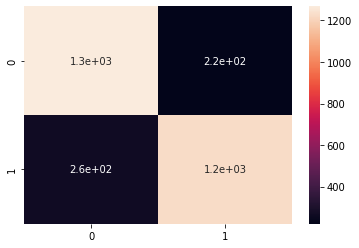

In [18]:
mat = confusion_matrix(y_val, model.predict(X_val) )

sb.heatmap(mat, annot=True)
